In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from datetime import date
import os

In [4]:
#Perform ANOVA with statsmodels anova_lm for each TF separately and return a dataframe with p-values
def ANOVA(PCA_per_TF):
    p_vals = pd.DataFrame(index=PCA_per_TF.T.index, columns=['C(organ)','C(dev_stage)','C(organ):C(dev_stage)'])
    for TF in p_vals.index:
        test_data = pd.DataFrame(PCA_per_TF.loc[:,TF])
        test_data = test_data.reset_index()
        test_data.columns = ["organ", "dev_stage", "TF_expr"]
        data = test_data
        TF_lm = ols('TF_expr ~ C(organ)+C(dev_stage)+C(organ):C(dev_stage)', data=data).fit()
        table = sm.stats.anova_lm(TF_lm, typ=2)
        p_vals.loc[TF,'C(organ)'] = table.iloc[0,3]
        p_vals.loc[TF,'C(dev_stage)'] = table.iloc[1,3]
        p_vals.loc[TF,'C(organ):C(dev_stage)'] = table.iloc[2,3]
        p_vals.index.name = 'TF'
    return p_vals
    
#Save data from performed experiments as tsv file
def save_exp(data, filename):
    if os.path.isdir('../exp/'+str(date.today())):
        data.to_csv('../exp/'+str(date.today())+'/'+filename+'.tsv', sep='\t')
    else:
        os.mkdir('../exp/'+str(date.today()))
        data.to_csv('../exp/'+str(date.today())+'/'+filename+'.tsv', sep='\t')

In [10]:
PCA_per_TF = pd.read_csv('../exp/'+str(date.today())+'/PCA_results.tsv', sep='\t')
#PCA_per_TF = PCA_per_TF.replace(['embryonic day 15.5','embryonic day 18.5','postnatal day 0.5','postnatal day 4','postnatal day 22','postnatal day 29'],[-5.5,-2.5,0.5,2,22,29])
PCA_per_TF = PCA_per_TF.set_index(['organ','dev_stage'])
PCA_per_TF.sort_index(inplace=True)

p_vals = ANOVA(PCA_per_TF)

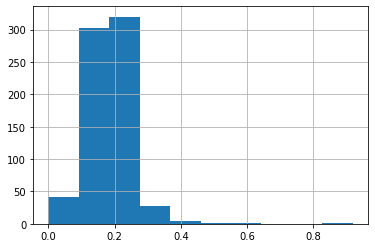

In [11]:
p_vals.loc[:,'C(organ):C(dev_stage)'].hist()

In [5]:
PCA_per_TF = pd.read_csv('../exp/2020-02-11/PCA_results.tsv', sep='\t')
#PCA_per_TF = PCA_per_TF.replace(['embryonic day 15.5','embryonic day 18.5','postnatal day 0.5','postnatal day 4','postnatal day 22','postnatal day 29'],[-5.5,-2.5,0.5,2,22,29])
PCA_per_TF = PCA_per_TF.set_index(['organ','dev_stage'])
PCA_per_TF.sort_index(inplace=True)

p_vals = ANOVA(PCA_per_TF)

In [12]:
low_p_vals = p_vals.loc[p_vals['C(organ):C(dev_stage)']<(0.05/len(p_vals))]
low_p_vals

,C(organ),C(dev_stage),C(organ):C(dev_stage)
TF,,,
Hnf1a,1.83412e-18,6.19586e-05,1.17409e-05
Rtf1,1.34285e-14,5.76547e-11,9.31578e-06


In [ ]:
save_exp(p_vals,'p_vals')